## To read the json file and it's context:

In [19]:
import json

with open("output3.json", "r", encoding='utf-8') as file:
    data = json.load(file)
file.close()

In [20]:
data_copy = data.copy

In [21]:
for item in data:
    if "tags" in item.keys():
        item["tags"] = [tag.strip("12345()").replace("\u200c", " ") for tag in item["tags"]]

In [22]:
all_tags = list()

for item in data:
    if "tags" in item.keys():
        [all_tags.append(tag) for tag in item["tags"]]

In [23]:
all_titles = list()

for item in data:
        all_titles.append(item["title"])

len(all_titles)

266

In [24]:
all_tags = [element.strip("12345()") for element in all_tags]
len(all_tags)

1641

In [25]:
unique_tags = list(set(all_tags))
len(unique_tags)

340

In [26]:
unique_tags

['پیش بینی رویگردانی مشتری',
 'توانگری مالی',
 'سیستم ارتباطات دوربرد',
 'الگوریتم الکترومغناطیس',
 'پژوهش',
 'سازماندهی مجدد',
 'سیستم مدیریت شکایات مشتری',
 'تجزیه و تحلیل خوشه ای',
 'تحلیل هم رخدادی واژگان',
 'بانکداری الکترونیکی',
 ' صنعت فولاد',
 'مهندسی مجدد',
 'شایستگی کارآفرینی',
 'پردازش اطلاعات',
 'محاسبات توزیع شده',
 'بازاریابی ارتباطی',
 'clients',
 'مدیریت صنعتی',
 'کنترل مبنی بر پیش بینی',
 'سازمان',
 'کیفیت',
 'کیفیّت داده',
 'مدیریت فروش',
 'بهره وری',
 'مدیریت پورتفوی مشتری',
 'sales management',
 'نمودار سازمانی',
 'فضای مجازی',
 'حجیم داده',
 'روابط میان پویایی مشتریان',
 'بخش بندی بر اساس مزایای مورد انتظار مشتریان',
 'داده های بزرگ',
 'توسعه نرم افزار',
 'مدیریت داده صلی',
 'الگوهای پویایی مشتریان',
 'عود مجدد سرطان',
 'شبکه برهم کنش پروتئین-پروتئین',
 'شبکه عصبی مصنوعی',
 'بازار رقابتی',
 'برنامه ریزی دو سطحی',
 'رتبه بندی',
 'سامانه اتوبوس رانی',
 'پردازش زبان طبیعی',
 'فرآیندهای اصلی هتل',
 'علم داده',
 'جذّابیت',
 'مدل سازی',
 'هزینه تصادفات',
 'بانک ملی ایران

In [9]:
# unique_tags = [i.replace("\u200c", " ") for i in unique_tags]

In [27]:
# unique_tags

In [11]:
# all_tags = [i.replace("\u200c", " ") for i in all_tags]

In [28]:
len(all_tags)

1641

In [29]:
import numpy as np
adjacency_matrix = np.zeros((len(unique_tags), len(unique_tags)))

In [30]:
tags_indices = {word:index for index, word in enumerate(unique_tags)}

## To create Adjacency Matrix:

In [31]:
for item in data:
    if "tags" in item.keys():
        for i in range(len(item["tags"])):
            for j in range(i+1, len(item["tags"])):
                tag1 = item["tags"][i]
                tag2 = item["tags"][j]
                index1 = tags_indices[tag1]
                index2 = tags_indices[tag2]
                adjacency_matrix[index1][index2] = 1
                adjacency_matrix[index2][index1] = 1

In [32]:
for item in data:
    for tag in item["tags"]:
        print(unique_tags.index(tag))

208
259
112
55
292
97
220
310
315
274
258
329
114
184
41
121
187
37
91
268
289
251
116
258
130
14
130
14
312
313
258
128
52
116
195
272
7
18
217
146
13
261
81
213
226
272
286
31
193
337
228
339
147
277
205
173
116
214
283
282
284
314
232
183
16
22
25
216
169
155
127
328
227
99
62
229
282
284
314
232
183
16
22
25
216
169
155
127
328
227
99
62
229
282
284
314
232
183
16
22
25
216
169
155
127
328
227
99
62
229
157
192
239
316
87
157
192
239
316
87
157
192
239
316
87
157
192
239
316
87
157
192
239
316
87
231
134
249
216
149
191
131
323
152
191
131
323
152
99


KeyError: 'tags'

In [33]:
file_path = 'adjacency_matrix.txt'
np.savetxt(file_path, adjacency_matrix, fmt='%d')

## To export the graph:

In [51]:
import arabic_reshaper
reshaped_unique_tags = [arabic_reshaper.reshape(tag) for tag in unique_tags]

In [44]:
encoded_unique_tags = [tag.encode('utf-8') for tag in unique_tags]

In [60]:
reshaped_unique_tags

['ﭘﯿﺶ ﺑﯿﻨﯽ ﺭﻭﯾﮕﺮﺩﺍﻧﯽ ﻣﺸﺘﺮﯼ',
 'ﺗﻮﺍﻧﮕﺮﯼ ﻣﺎﻟﯽ',
 'ﺳﯿﺴﺘﻢ ﺍﺭﺗﺒﺎﻃﺎﺕ ﺩﻭﺭﺑﺮﺩ',
 'ﺍﻟﮕﻮﺭﯾﺘﻢ ﺍﻟﮑﺘﺮﻭﻣﻐﻨﺎﻃﯿﺲ',
 'ﭘﮋﻭﻫﺶ',
 'ﺳﺎﺯﻣﺎﻧﺪﻫﯽ ﻣﺠﺪﺩ',
 'ﺳﯿﺴﺘﻢ ﻣﺪﯾﺮﯾﺖ ﺷﮑﺎﯾﺎﺕ ﻣﺸﺘﺮﯼ',
 'ﺗﺠﺰﯾﻪ ﻭ ﺗﺤﻠﯿﻞ ﺧﻮﺷﻪ ﺍﯼ',
 'ﺗﺤﻠﯿﻞ ﻫﻢ ﺭﺧﺪﺍﺩﯼ ﻭﺍﮊﮔﺎﻥ',
 'ﺑﺎﻧﮑﺪﺍﺭﯼ ﺍﻟﮑﺘﺮﻭﻧﯿﮑﯽ',
 ' ﺻﻨﻌﺖ ﻓﻮﻻﺩ',
 'ﻣﻬﻨﺪﺳﯽ ﻣﺠﺪﺩ',
 'ﺷﺎﯾﺴﺘﮕﯽ ﮐﺎﺭﺁﻓﺮﯾﻨﯽ',
 'ﭘﺮﺩﺍﺯﺵ ﺍﻃﻼﻋﺎﺕ',
 'ﻣﺤﺎﺳﺒﺎﺕ ﺗﻮﺯﯾﻊ ﺷﺪﻩ',
 'ﺑﺎﺯﺍﺭﯾﺎﺑﯽ ﺍﺭﺗﺒﺎﻃﯽ',
 'clients',
 'ﻣﺪﯾﺮﯾﺖ ﺻﻨﻌﺘﯽ',
 'ﮐﻨﺘﺮﻝ ﻣﺒﻨﯽ ﺑﺮ ﭘﯿﺶ ﺑﯿﻨﯽ',
 'ﺳﺎﺯﻣﺎﻥ',
 'ﮐﯿﻔﯿﺖ',
 'ﮐﯿﻔﯿﺖ ﺩﺍﺩﻩ',
 'ﻣﺪﯾﺮﯾﺖ ﻓﺮﻭﺵ',
 'ﺑﻬﺮﻩ ﻭﺭﯼ',
 'ﻣﺪﯾﺮﯾﺖ ﭘﻮﺭﺗﻔﻮﯼ ﻣﺸﺘﺮﯼ',
 'sales management',
 'ﻧﻤﻮﺩﺍﺭ ﺳﺎﺯﻣﺎﻧﯽ',
 'ﻓﻀﺎﯼ ﻣﺠﺎﺯﯼ',
 'ﺣﺠﯿﻢ ﺩﺍﺩﻩ',
 'ﺭﻭﺍﺑﻂ ﻣﯿﺎﻥ ﭘﻮﯾﺎﯾﯽ ﻣﺸﺘﺮﯾﺎﻥ',
 'ﺑﺨﺶ ﺑﻨﺪﯼ ﺑﺮ ﺍﺳﺎﺱ ﻣﺰﺍﯾﺎﯼ ﻣﻮﺭﺩ ﺍﻧﺘﻈﺎﺭ ﻣﺸﺘﺮﯾﺎﻥ',
 'ﺩﺍﺩﻩ ﻫﺎﯼ ﺑﺰﺭﮒ',
 'ﺗﻮﺳﻌﻪ ﻧﺮﻡ ﺍﻓﺰﺍﺭ',
 'ﻣﺪﯾﺮﯾﺖ ﺩﺍﺩﻩ ﺻﻠﯽ',
 'ﺍﻟﮕﻮﻫﺎﯼ ﭘﻮﯾﺎﯾﯽ ﻣﺸﺘﺮﯾﺎﻥ',
 'ﻋﻮﺩ ﻣﺠﺪﺩ ﺳﺮﻃﺎﻥ',
 'ﺷﺒﮑﻪ ﺑﺮﻫﻢ ﮐﻨﺶ ﭘﺮﻭﺗﺌﯿﻦ-ﭘﺮﻭﺗﺌﯿﻦ',
 'ﺷﺒﮑﻪ ﻋﺼﺒﯽ ﻣﺼﻨﻮﻋﯽ',
 'ﺑﺎﺯﺍﺭ ﺭﻗﺎﺑﺘﯽ',
 'ﺑﺮﻧﺎﻣﻪ ﺭﯾﺰﯼ ﺩﻭ ﺳﻄﺤﯽ',
 'ﺭﺗﺒﻪ ﺑﻨﺪﯼ',
 'ﺳﺎﻣﺎﻧﻪ ﺍﺗﻮﺑﻮﺱ ﺭﺍﻧﯽ',
 'ﭘﺮﺩﺍﺯﺵ ﺯﺑﺎﻥ ﻃﺒﯿﻌﯽ',
 'ﻓﺮﺁﯾﻨﺪﻫﺎﯼ ﺍﺻﻠﯽ ﻫﺘﻞ',
 'ﻋﻠﻢ ﺩﺍﺩﻩ',
 'ﺟﺬﺍﺑﯿﺖ',
 'ﻣﺪﻝ ﺳﺎﺯﯼ',
 'ﻫﺰﯾﻨﻪ ﺗﺼﺎﺩﻓﺎﺕ',
 'ﺑﺎﻧﮏ ﻣﻠﯽ ﺍﯾﺮﺍﻥ',
 

In [56]:
from igraph import Graph
from igraph import plot

graph = Graph.Read_Adjacency("adjacency_matrix.txt")
graph.vs["name"] = reshaped_unique_tags
graph.vs["label"] = reshaped_unique_tags

In [57]:
degree_centrality = graph.degree()
pagerank_centrality = graph.pagerank()

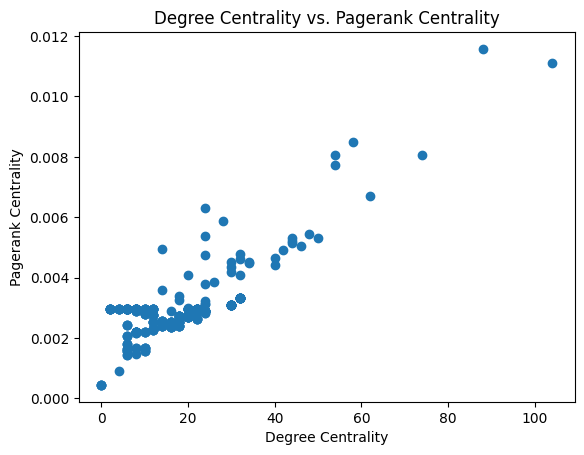

In [58]:
import matplotlib.pyplot as plt
plt.scatter(degree_centrality, pagerank_centrality)
plt.title("Degree Centrality vs. Pagerank Centrality")
plt.xlabel("Degree Centrality")
plt.ylabel("Pagerank Centrality")
plt.show()

In [62]:
import arabic_reshaper

min_size = 10
max_size = 100
node_sizes = [(degree - min(degree_centrality)) / (max(degree_centrality) - min(degree_centrality)) 
              * (max_size - min_size) + min_size for degree in degree_centrality]

layout = graph.layout("kk")  # Choose a layout algorithm (e.g., "circle", "fr", "kk", etc.)
# visual_style = {}
# visual_style['vertex.label.family'] = 'Arial'
# visual_style['vertex.label.cex'] = 1.2
plot(graph, layout=layout, vertex_size=node_sizes, vertex_color="lightblue", edge_color="gray",
        vertex_frame_color="black", edge_width=1.0, bbox=(1200, 300), margin=20)